# Estimating uncertainty

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import corner

from epistasis.simulate import LinearSimulation
from epistasis.models import EpistasisLinearRegression
from epistasis.sampling.bayesian import BayesianSampler

Simulate a genotype-phenotype map from epistatic coefs

In [2]:
sim = LinearSimulation.from_length(3, model_type="local")
sim.set_coefs_order(3)
sim.set_coefs_random((-1,1))
sim.set_stdeviations([0.01])

Fit a linear epistasis model.

In [3]:
model = EpistasisLinearRegression.from_gpm(sim, order=4, model_type="local")
model.fit()

Initialize a sampler object and sample.

In [14]:
bayes = BayesianSampler(model)
bayes.add_samples(500)

Plot the posterior distributions of all coefs.

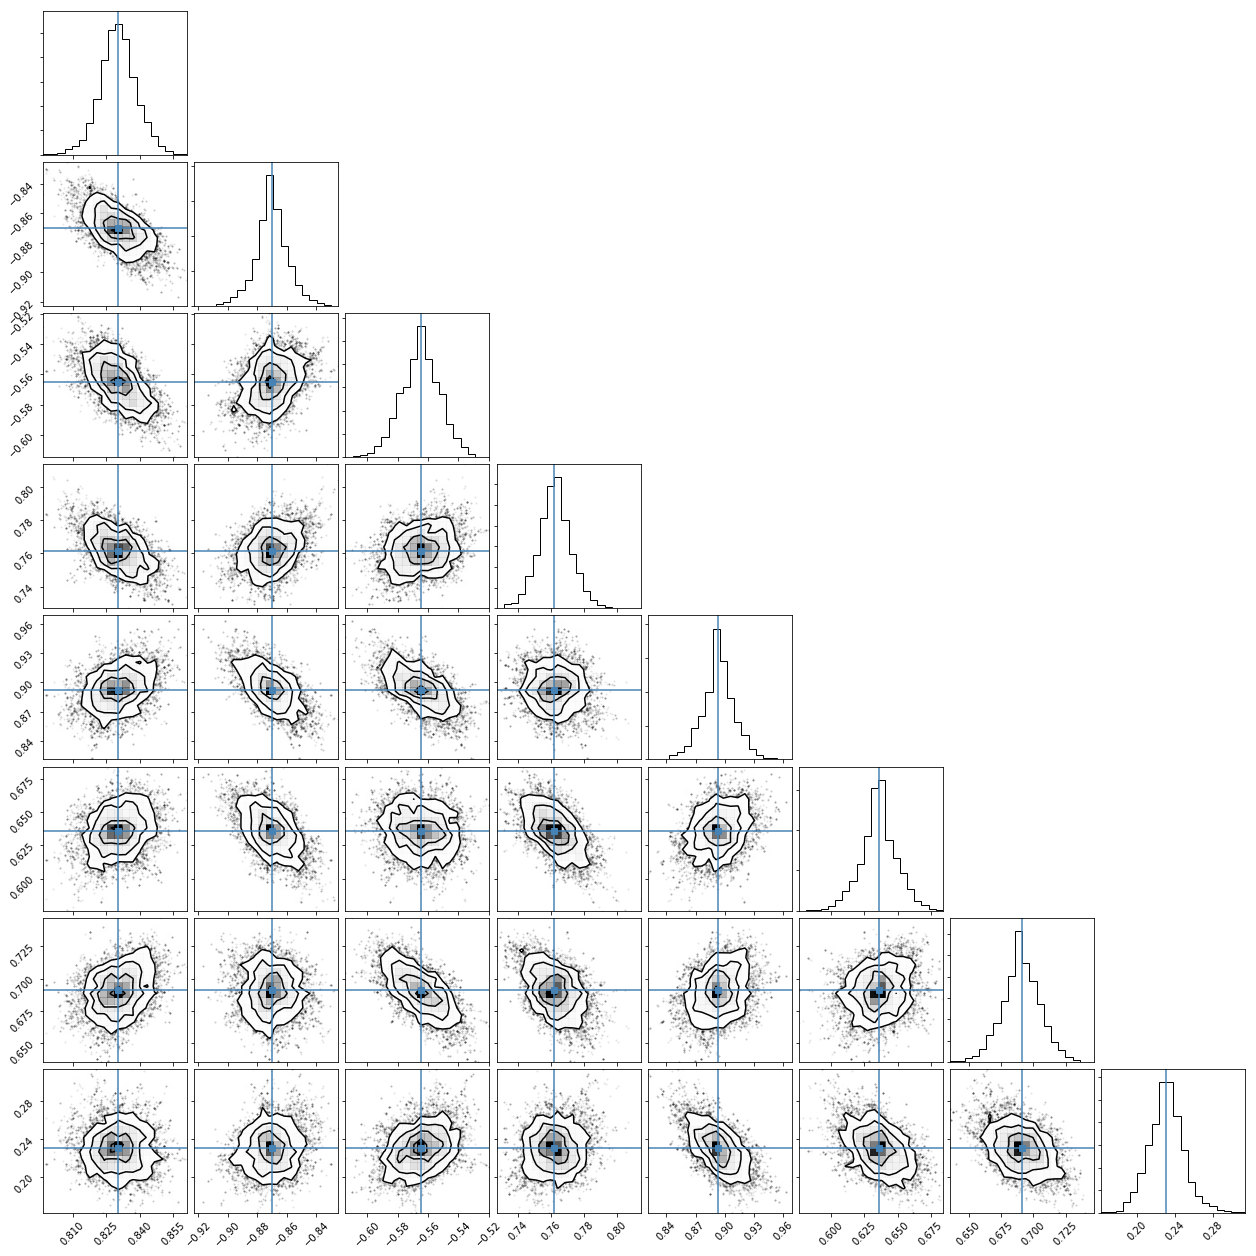

In [18]:
fig = corner.corner(bayes.coefs.value, truths=sim.epistasis.values)

Print the estimated coefs and uncertainties.

In [16]:
lower, mean, upper = bayes.percentiles([2.5, 50, 97.5])
for i, mu in enumerate(mean):
    print("{:>10f} vs {:>10f} +{:>10f} or -{:10f}".format(*[ sim.epistasis.values[i], mu, upper[i]-mu, mu-lower[i]]))

  0.830193 vs   0.830109 +  0.017016 or -  0.016622
 -0.870148 vs  -0.870332 +  0.023292 or -  0.023731
 -0.564787 vs  -0.564696 +  0.024854 or -  0.025843
  0.761446 vs   0.761960 +  0.020465 or -  0.019154
  0.892628 vs   0.893215 +  0.034345 or -  0.035424
  0.635761 vs   0.635672 +  0.027391 or -  0.028744
  0.690941 vs   0.690551 +  0.029467 or -  0.029918
  0.230894 vs   0.230445 +  0.041726 or -  0.036032
